# Import libraries and modules

In [1]:
import sys
from pathlib import Path

import matplotlib.pyplot as plt
import wfdb
import csv
import numpy
import pandas as pd

from Modules.Feature_Extraction import *

# Read preprocessed data from CSV files
The preprocessed data containing signals for ECG (II, aVR), PPG and ABP is stored in CSV files. Data is read from the CSV files and stored in lists. Both the filtered and unfiltered data is read.

In [ ]:
def read_csv(filepath):
    signals = pd.read_csv(filepath, sep=',', header=None)

    return signals.to_numpy()

abp = read_csv('Preprocessed_data/abp/abp_unfiltered.csv')
abp_filt = read_csv('Preprocessed_data/abp/abp_filtered.csv')
ppg  = read_csv('Preprocessed_data/ppg/ppg_unfiltered.csv')
ppg_filt = read_csv('Preprocessed_data/ppg/ppg_filtered.csv')
aVR = read_csv('Preprocessed_data/avr/avr_unfiltered.csv')
avr_filt  = read_csv('Preprocessed_data/avr/avr_filtered.csv')
ecg = read_csv('Preprocessed_data/ecg/ecg_unfiltered.csv')
ecg_filt = read_csv('Preprocessed_data/ecg/ecg_filtered.csv')

fs = read_csv('Preprocessed_data/fs/fs.csv')

In [123]:
ppg_filt2 = []
for i in range(len(ppg_filt)):
    ppg_filt2.append(ppg_filt[i][1000:2000])

abp_filt2 = []
for i in range(len(abp_filt)):
    abp_filt2.append(abp_filt[i][1000:2000])

ecg_filt2 = []
for i in range(len(ecg)):
    ecg_filt2.append(ecg[i][1000:2000])


# Feature Extraction from PPG
### Detect Beats in the PPG Signals

Text(0, 0.5, 'PPG [V]')

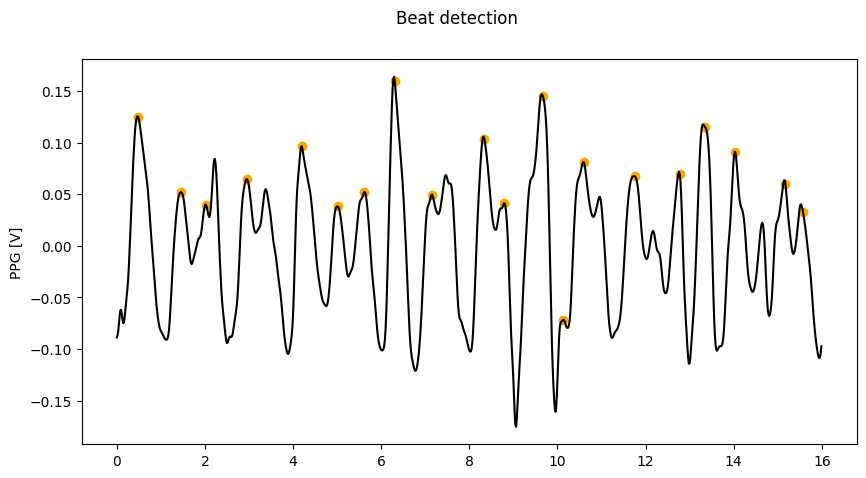

In [202]:
fs_temp = 125

ppg_beats = []
for i in range(len(ppg_filt2)):
    ppg_beats.append(pulse_detect(ppg_filt2[i], fs_temp, 5,'upslopes'))
    # if any(ppg_beats[i]):
    #     print(f"Detected {len(ppg_beats[i])} beats in the PPG signal for the {i}th patient")

patient_num = 0
fig, (ax1) = plt.subplots(1, 1,
                          sharex = False,
                          sharey = False,
                          figsize = (10,5))

fig.suptitle('Beat detection')
#fs = fs[0][0]
t = np.arange(0, len(ppg_filt2[patient_num])/fs,1.0/fs)

ax1.plot(t[0:1000], ppg_filt2[patient_num], color = 'black')
ax1.scatter(t[patient_num] + ppg_beats[patient_num]/fs,
            ppg_filt2[patient_num][ppg_beats[patient_num]],
            color = 'orange',
            marker = 'o')
ax1.set_ylabel('PPG [V]')

### Detect fiducial points in PPG Signals

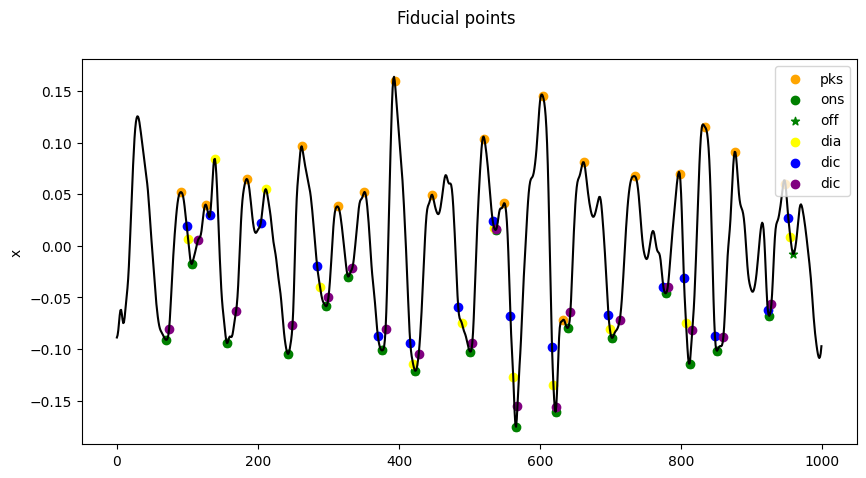

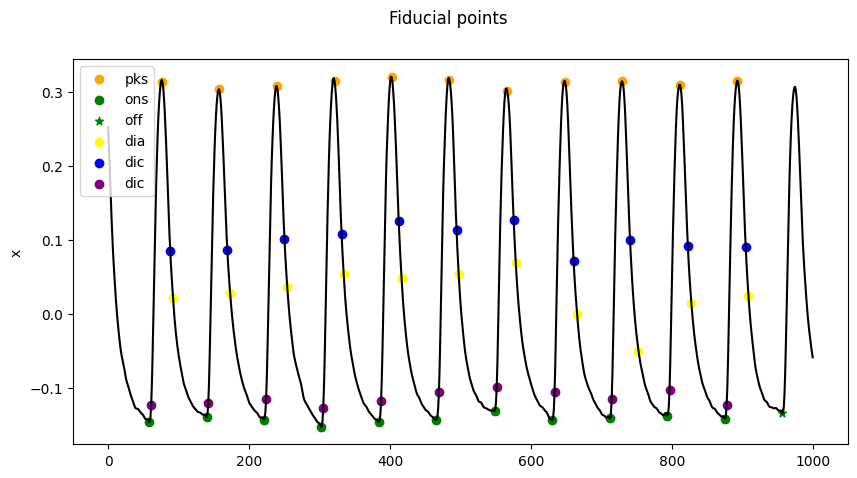

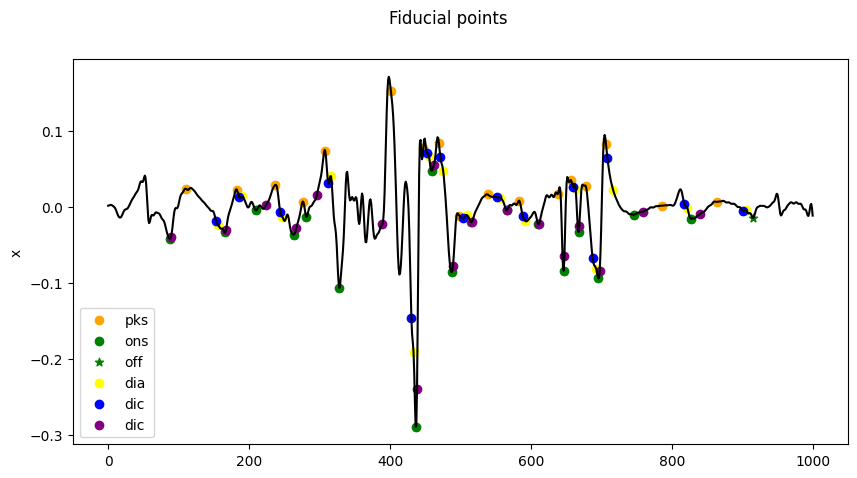

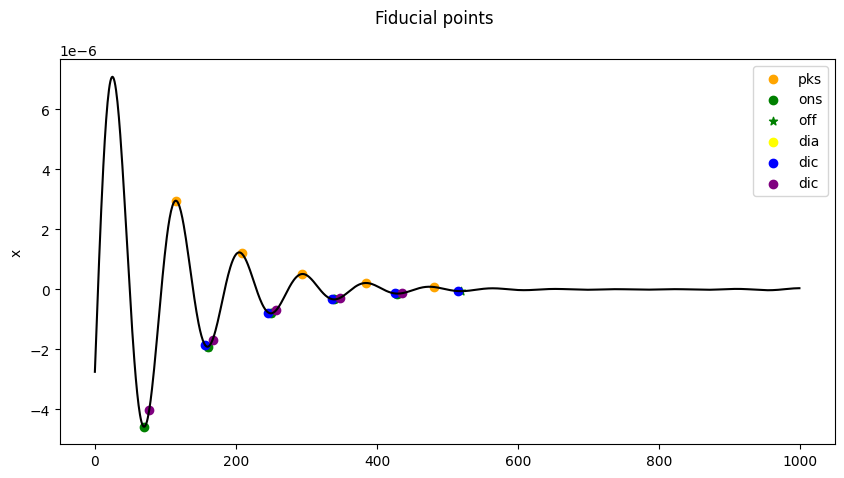

In [198]:
fidp = []

for i in range(len(ppg_beats)):
    try:
        fidp.append(fiducial_points2(ppg_filt2[i], ppg_beats[i], fs, vis = True))
    except:
        pass

### Calculating pulse wave features
We are going to calculate two features from the fiducial points extracted from the PPG signals:
- Delta T (time difference between diastolic and systolic peak)
- CT (time difference between systolic peak and onset)

![title](images/pulse_wave.jpg)

In [143]:
delta_t = []

for i in range(len(fidp)):
    delta_t.append(np.zeros(len(fidp[i]["dia"])))
    for beat_no in range(len(fidp[i]["dia"])):
        delta_t[i][beat_no] = (fidp[i]["dia"][beat_no]-fidp[i]["pks"][beat_no])/fs
    print("Values of Delta T:")
    print(delta_t)

Values of Delta T:
[array([0.16007043, 0.20809156, 0.43219016, 0.41618312, 1.71275361,
       2.20897195, 2.25699308, 1.84080996, 1.56869022, 2.40105646,
       3.24942975, 5.15426788])]
Values of Delta T:
[array([0.16007043, 0.20809156, 0.43219016, 0.41618312, 1.71275361,
       2.20897195, 2.25699308, 1.84080996, 1.56869022, 2.40105646,
       3.24942975, 5.15426788]), array([0.24010565, 0.25611269, 0.24010565, 0.20809156, 0.2240986 ,
       0.20809156, 0.19208452, 0.27211973, 0.36816199, 0.25611269,
       0.25611269])]
Values of Delta T:
[array([0.16007043, 0.20809156, 0.43219016, 0.41618312, 1.71275361,
       2.20897195, 2.25699308, 1.84080996, 1.56869022, 2.40105646,
       3.24942975, 5.15426788]), array([0.24010565, 0.25611269, 0.24010565, 0.20809156, 0.2240986 ,
       0.20809156, 0.19208452, 0.27211973, 0.36816199, 0.25611269,
       0.25611269]), array([0.72031694, 0.1120493 , 0.16007043, 0.62427468, 2.00088039,
       0.86438033, 0.44819721, 0.64028172, 0.9284085 , 0.84837

In [144]:
ct = []

for i in range(len(fidp)):
    ct.append(np.zeros(len(fidp[i]["pks"])))
    for beat_no in range(len(fidp[i]["pks"])):
        ct[i][beat_no] = (fidp[i]["pks"][beat_no]-fidp[i]["ons"][beat_no])/fs
    print("Values of CT:")
    print(ct)

Values of CT:
[array([0.33614791, 0.32014086, 0.44819721, 0.30413382, 0.25611269,
       0.36816199, 0.28812678, 0.38416903, 0.32014086, 0.19208452,
       0.60826764, 0.17607747, 0.36816199, 0.51222538, 0.32014086,
       0.35215495, 0.41618312, 0.36816199])]
Values of CT:
[array([0.33614791, 0.32014086, 0.44819721, 0.30413382, 0.25611269,
       0.36816199, 0.28812678, 0.38416903, 0.32014086, 0.19208452,
       0.60826764, 0.17607747, 0.36816199, 0.51222538, 0.32014086,
       0.35215495, 0.41618312, 0.36816199]), array([0.30413382, 0.27211973, 0.28812678, 0.30413382, 0.28812678,
       0.30413382, 0.28812678, 0.28812678, 0.28812678, 0.28812678,
       0.27211973])]
Values of CT:
[array([0.33614791, 0.32014086, 0.44819721, 0.30413382, 0.25611269,
       0.36816199, 0.28812678, 0.38416903, 0.32014086, 0.19208452,
       0.60826764, 0.17607747, 0.36816199, 0.51222538, 0.32014086,
       0.35215495, 0.41618312, 0.36816199]), array([0.30413382, 0.27211973, 0.28812678, 0.30413382, 0.28812

# Feature Extraction from ABP
### Detect Beats in the ABP Signals

Text(0, 0.5, 'ABP [V]')

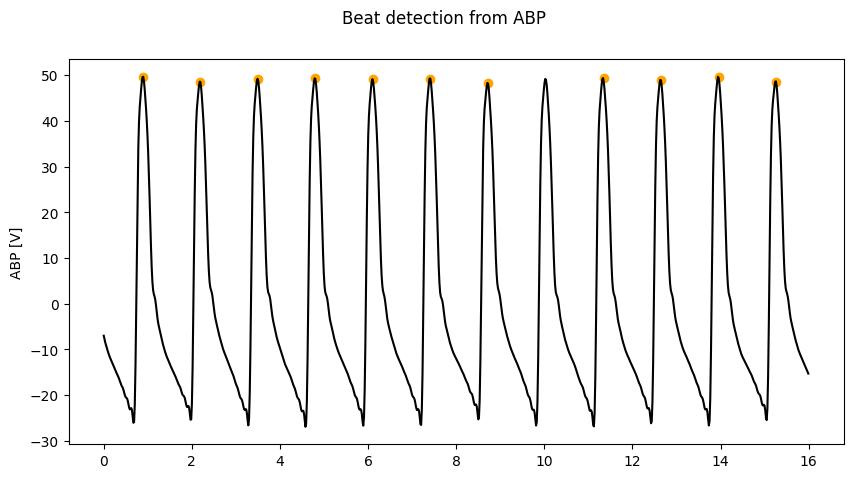

In [199]:
fs_temp = 125

abp_beats = []
for i in range(len(abp_filt2)):
    abp_beats.append(pulse_detect(abp_filt2[i], fs_temp, 5,'upslopes'))
    # if any(abp_beats[i]):
    #     print(f"Detected {len(abp_beats[i])} beats in the ABP signal for the {i}th patient")

fig, (ax1) = plt.subplots(1, 1,
                          sharex = False,
                          sharey = False,
                          figsize = (10,5))

fig.suptitle('Beat detection from ABP')
#fs = fs[0][0]
t = np.arange(0, len(abp_filt2[1])/fs,1.0/fs)

ax1.plot(t[0:1000], abp_filt2[1], color = 'black')
ax1.scatter(t[1] + abp_beats[1]/fs,
            abp_filt2[1][abp_beats[1]],
            color = 'orange',
            marker = 'o')
ax1.set_ylabel('ABP [V]')

### Detect fiducial points from ABP waveform

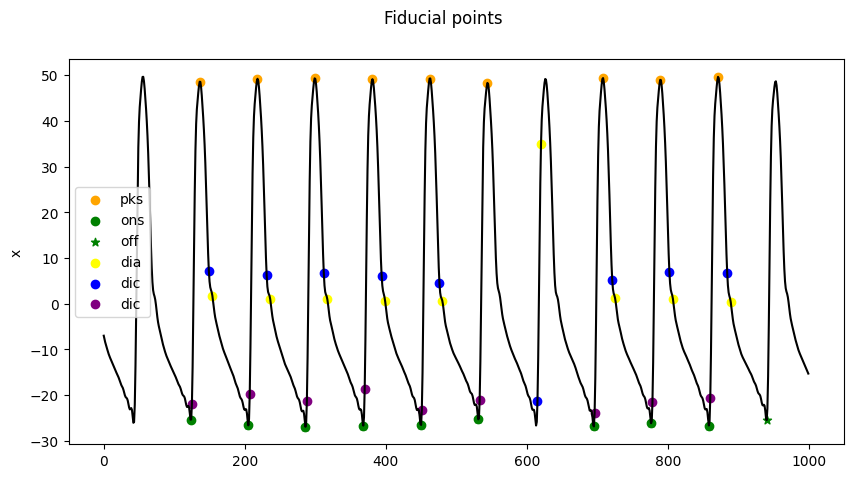

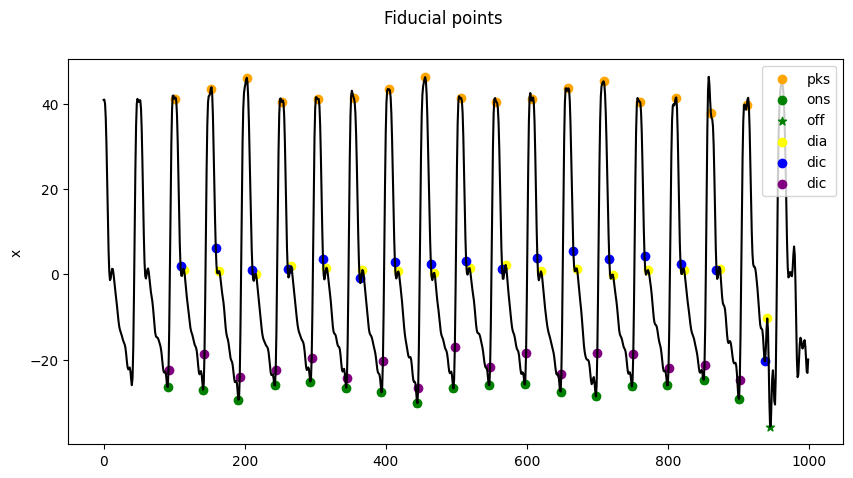

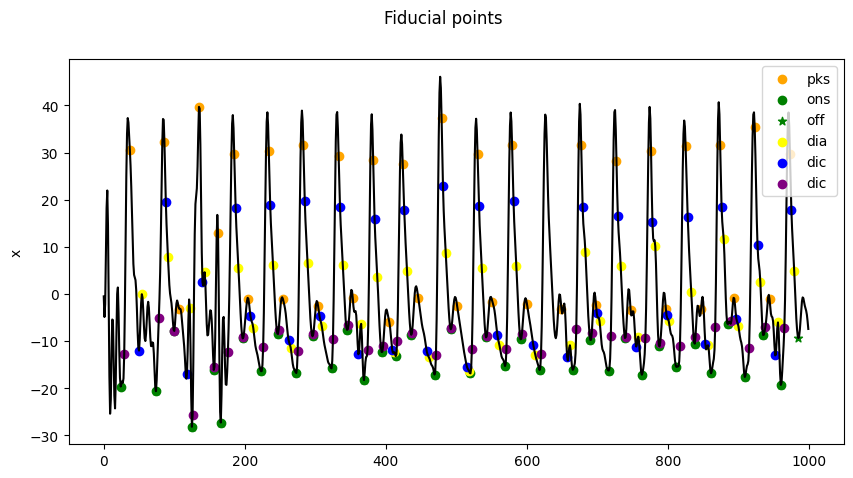

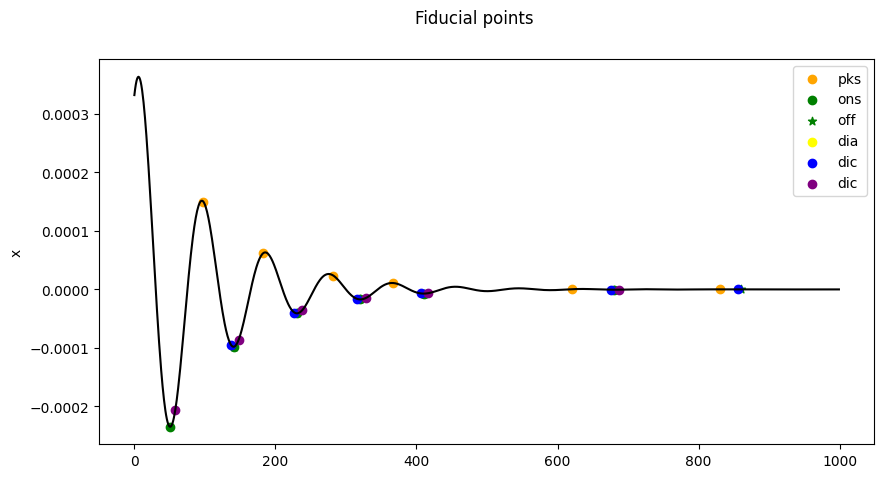

In [149]:
fidp_abp = []

for i in range(len(abp_beats)):
    try:
        fidp_abp.append(fiducial_points2(abp_filt2[i], abp_beats[i], fs, vis = True))
    except:
        pass

### Calculating Blood Pressure values from onset and systolic peak
The systolic pressure is the median value of the sysloic peak and the diastolic pressure is the meadian value of the onset

![title](images/Blood_pressure_wave.jpg)

In [155]:
for i in range(0, len(fidp_abp)):
    #Extract systolic and diastolic BPs:
    sbp = np.median(abp[i+1][fidp_abp[i]['pks']])
    dbp = np.median(abp[i+1][fidp_abp[i]['ons']])

    #Extract mean blood pressure
    ons = fidp_abp[i]['ons']
    off = fidp_abp[i]['off']
    mbps = np.zeros(len(ons))
    for beat_no in range(0,len(ons)):
        mbps[beat_no] = np.mean(abp[i+1][ons[beat_no]:off[beat_no]])
    mbp = np.median(mbps)

    #print results
    print('Example patient '+ str(i)+':')
    print('Systolic blood pressure  (SBP): {:.1f} mmHg'.format(sbp))
    print('Diastolic blood pressure (DBP): {:.1f} mmHg'.format(dbp))
    print('Mean blood pressure      (MBP): {:.1f} mmHg'.format(mbp))
    print('----------------------------------------------------')

Example patient 0:
Systolic blood pressure  (SBP): 48.7 mmHg
Diastolic blood pressure (DBP): 53.0 mmHg
Mean blood pressure      (MBP): 69.9 mmHg
----------------------------------------------------
Example patient 1:
Systolic blood pressure  (SBP): 80.1 mmHg
Diastolic blood pressure (DBP): 117.4 mmHg
Mean blood pressure      (MBP): 79.2 mmHg
----------------------------------------------------
Example patient 2:
Systolic blood pressure  (SBP): 70.1 mmHg
Diastolic blood pressure (DBP): 77.8 mmHg
Mean blood pressure      (MBP): 78.4 mmHg
----------------------------------------------------
Example patient 3:
Systolic blood pressure  (SBP): 0.0 mmHg
Diastolic blood pressure (DBP): 0.0 mmHg
Mean blood pressure      (MBP): 0.0 mmHg
----------------------------------------------------


# Feature Extraction from ECG (II)
### QRS Extraction from ECG signals


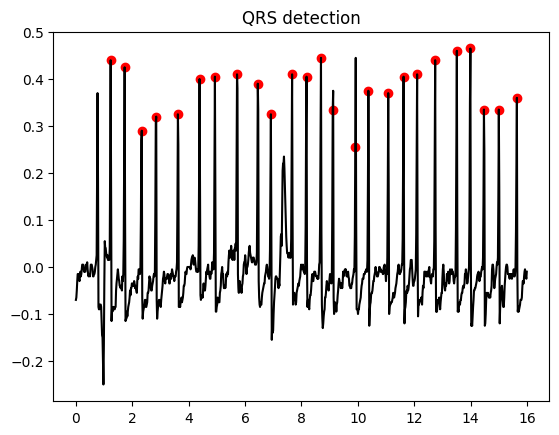

In [200]:
fs_temp = 125

# Detect cardiac cycles
qrs = []
try:
    for i in range(len(ecg_filt2)):
        qrs_temp, n_int = qrs_detect(ecg_filt2[i],fs_temp,5)
        qrs.append(qrs_temp)
        # if any(qrs[i]):
        #     print(f"Detected {len(qrs[i])} cardiac cycles in the ECG signal for the {i}th patient")
except:
    pass

pateint_num = 0
t = np.arange(0, len(ecg_filt2[pateint_num])/fs,1.0/fs)

fig = plt.figure()
plt.title('QRS detection')
plt.plot(t[0:1000], ecg_filt2[pateint_num], color = 'black')
plt.scatter(0 + qrs[pateint_num]/fs, ecg_filt2[pateint_num][qrs[pateint_num]], color = 'red', marker = 'o')